In [1]:
import dgl

from Coarsener.HeteroRGCNCoarsener import HeteroRGCNCoarsener
from Data.DBLP import DBLP
import dgl.function as fn
import torch
import numpy as np
import torch_geometric
torch.cuda.empty_cache()


/home/robin/thesis/hetero-conv-matching/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

dataset = DBLP() 
original_graph = dataset.load_graph(n_components=30)
device= "cuda:0"
original_graph = original_graph.to(device)


In [3]:
original_graph

Graph(num_nodes={'author': 4057, 'conference': 20, 'paper': 14328, 'term': 7723},
      num_edges={('author', 'authortopaper', 'paper'): 19645, ('conference', 'conferencetopaper', 'paper'): 14328, ('paper', 'papertoauthor', 'author'): 19645, ('paper', 'papertoconference', 'conference'): 14328, ('paper', 'papertoterm', 'term'): 85810, ('term', 'termtopaper', 'paper'): 85810},
      metagraph=[('author', 'paper', 'authortopaper'), ('paper', 'author', 'papertoauthor'), ('paper', 'conference', 'papertoconference'), ('paper', 'term', 'papertoterm'), ('conference', 'paper', 'conferencetopaper'), ('term', 'paper', 'termtopaper')])

In [3]:

num_nearest_init_neighbors_per_type = {"papertoauthor": 50, "authortopaper": 50, "conferencetopaper":50, "papertoconference":50,"papertoterm":50, "termtopaper":50, "author":50 , "paper":50, "conference": 50, "term":50}
from Projections.CCA import CCA
coarsener = HeteroRGCNCoarsener(original_graph, num_nearest_init_neighbors_per_type, use_zscore=False,device=device,
                                cca_cls=CCA, checkpoints=[0.9], folder_name="dblp_cca_new", batch_size=None,
                                pairs_per_level=5,norm_p=1, approx_neigh=True, add_feat=True, use_out_degree=False) 

coarsener.init()

coarsener.summarize()

/home/robin/thesis/hetero-conv-matching/.venv/lib/python3.10/site-packages/dgl/transforms/functional.py:1367: DGLWarning: share_ndata argument has been renamed to copy_ndata.
  dgl_warning("share_ndata argument has been renamed to copy_ndata.")


authortopaper
conferencetopaper
papertoauthor
papertoconference
papertoterm
termtopaper
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 0, ratio: 1.0


/home/robin/thesis/hetero-conv-matching/Coarsener/HeteroCoarsener.py:438: UserWarning: torch.searchsorted(): boundary tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous boundary tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:38.)
  indices = torch.searchsorted(sorted_mapping[:, 0], query_nodes)


0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 1, ratio: 0.9998469075321494
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 2, ratio: 0.9996555419473362
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 3, ratio: 0.9993876301285977
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 4, ratio: 0.9991197183098591
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 5, ratio: 0.9988900796080833
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 6, ratio: 0.9986604409063075
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 7, ratio: 0.9985073484384568
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 8, ratio: 0.998277709736681
0.7763701775872627
0.0038273116962645433
0.7418860992039189
0.4779164115125538
step: 9, r

In [16]:
coarsener.checkpoints = [0.9,0.8] 
coarsener.summarize()

step: 0, ratio: 0.8999540722596449


/home/robin/thesis/hetero-conv-matching/.venv/lib/python3.10/site-packages/dgl/transforms/functional.py:1367: DGLWarning: share_ndata argument has been renamed to copy_ndata.
  dgl_warning("share_ndata argument has been renamed to copy_ndata.")


0.6583682524032533
0.0
0.0
0.27618800984073566
step: 1, ratio: 0.8997627066748316
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 2, ratio: 0.899188609920392
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 3, ratio: 0.8986145131659522
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 4, ratio: 0.8980404164115126
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 5, ratio: 0.8977342314758114
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 6, ratio: 0.8971984078383344
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 7, ratio: 0.8967391304347826
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 8, ratio: 0.8962033067973055
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 9, ratio: 0.8955143906919779
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 10, ratio: 0.8950168401714635
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 11, ratio: 0.8939834660134721
0.6583682524032533
0.0
0.0
0.27618800984073566
step: 12, ratio: 0.8934093692590325
0.658368252403

KeyboardInterrupt: 

In [13]:
coarsener.metrics["num_nodes"]["paper"]

[14323,
 14318,
 14313,
 14308,
 14303,
 14298,
 14294,
 14289,
 14284,
 14280,
 14275,
 14270]

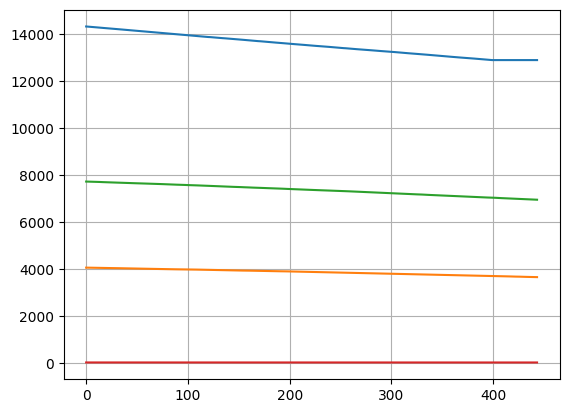

In [4]:
import matplotlib.pyplot as plt

x = range(len(coarsener.metrics["num_nodes"]["paper"]))
y1 = [i for i in coarsener.metrics["num_nodes"]["paper"]]
y2 = [i for i in coarsener.metrics["num_nodes"]["author"]]
y3 = [i for i in coarsener.metrics["num_nodes"]["term"]]
y4 = [i for i in coarsener.metrics["num_nodes"]["conference"]]


plt.plot(x, coarsener.metrics["num_nodes"]["paper"])
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

plt.grid(True)
plt.show()


In [5]:
coarsener.summarized_graph.num_nodes(ntype="paper") /original_graph.num_nodes(ntype="paper")


coarsener.summarized_graph.num_nodes(ntype="author") /original_graph.num_nodes(ntype="author")

0.9886615725905842

In [23]:


coarsener.summarized_graph.num_nodes(ntype="paper") / coarsener.summarized_graph.num_nodes()

original_graph.num_nodes(ntype="paper") /original_graph.num_nodes()

0.5483772198407838

In [ ]:
import pickle
with open(f'results/dblp_cca/0.1', 'rb') as fh:
        
    coarsener = pickle.load(fh) 

In [ ]:

coarsend_graph = coarsener.summarized_graph

#coarsend_graph = coarsend_graph.cpu()
mapping = coarsener.get_mapping("author")
coarsener.make_mask(mapping, "author")

labels = coarsener.get_labels(mapping, "author")
coarsend_graph.nodes["author"].data["label"] = torch.tensor([labels[i] for i in range(len(labels)) ],  device=coarsend_graph.device) #,
print("ratio", coarsend_graph.num_nodes()/ original_graph.num_nodes() ) 


ratio 0.9997320881812615


In [ ]:
coarsend_graph 

Graph(num_nodes={'author': 94, 'conference': 1, 'paper': 2439, 'term': 77},
      num_edges={('author', 'authortopaper', 'paper'): 3290, ('conference', 'conferencetopaper', 'paper'): 2439, ('paper', 'papertoauthor', 'author'): 3290, ('paper', 'papertoconference', 'conference'): 2439, ('paper', 'papertoterm', 'term'): 6645, ('term', 'termtopaper', 'paper'): 6645},
      metagraph=[('author', 'paper', 'authortopaper'), ('paper', 'author', 'papertoauthor'), ('paper', 'conference', 'papertoconference'), ('paper', 'term', 'papertoterm'), ('conference', 'paper', 'conferencetopaper'), ('term', 'paper', 'termtopaper')])

In [ ]:
print("ratio", coarsend_graph.num_nodes()/ original_graph.num_nodes() ) 

ratio 0.29998469075321493


In [ ]:
from Models.SimpleHeteroGCN import HeteroGCNCiteer    
from Models.ImprovedGCN import ImprovedGCN
from Models.HeteroSage import HeteroSAGE
from Models.HeteroSGC import HeteroSGCPaper

from Experiments.model_helper import run_experiments

orig, coar, loss_ori, loss_coar = run_experiments(original_graph, coarsend_graph,  HeteroSGCPaper,
                                                  model_param={"hidden_dim": 64,"num_layers":4},
                        optimizer_param={"lr": 0.01, "weight_decay": 5e-4},
                        num_runs=1, epochs=200,eval_interval=1, target_node_type="author")
orig_short = [ o[-1] for o in orig ]
coar_short = [ o[-1] for o in coar ]
from Experiments.plots import plot_bar, plot_line


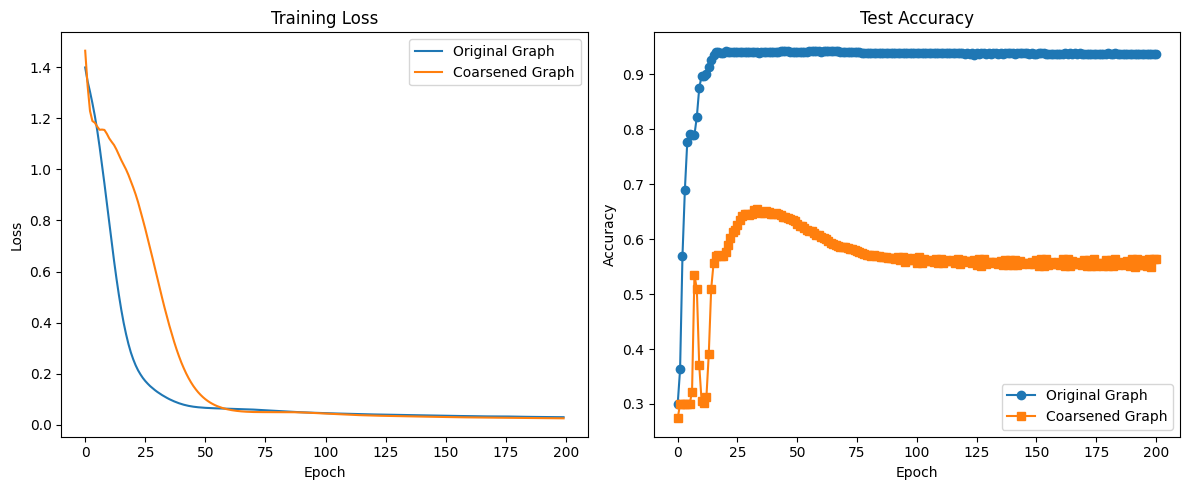

Final Performance Comparison:
Original Graph Accuracy: 0.9368
Coarsened Graph Accuracy: 0.5631

Original Graph Accuracy:
  Mean: 0.9368
  Std:  0.0000

Coarsened Graph Accuracy:
  Mean: 0.5631
  Std:  0.0000


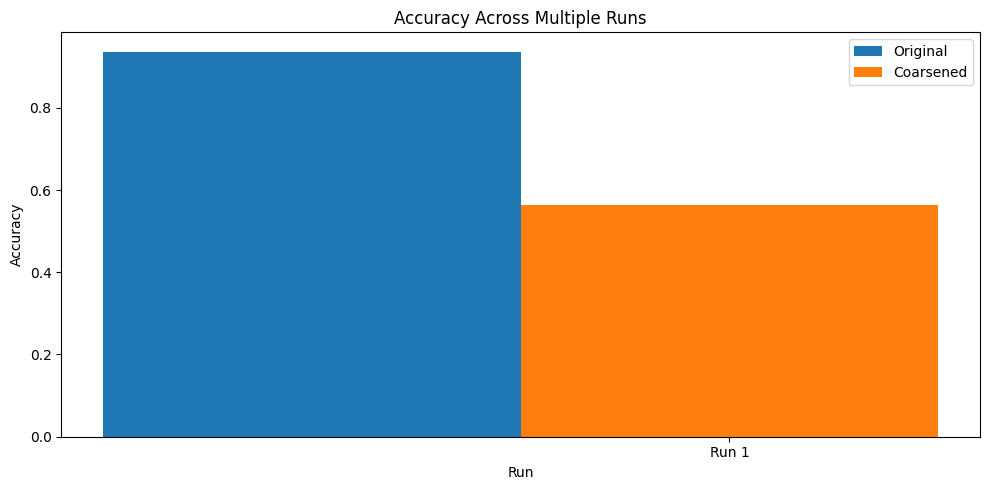

In [ ]:

epochs = list(range(200))
plot_line(orig[0], coar[0], loss_ori[0], loss_coar[0], epochs)
plot_bar(orig_short, coar_short)